<a href="https://colab.research.google.com/github/Sshalin123/AI-algorithms/blob/main/polynomial_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nearest-Neighbor Interpolation
This is the simplest form of interpolation. It assigns the value of the nearest known data point to the unknown point.


How it works: Finds the closest data point and takes its value.

Best for: Blocky or discrete data, like digital images when you want to maintain sharp edges (pixelation). It's very fast but not very accurate.




Polynomial Interpolation
This method fits a single polynomial function that passes through all the known data points.

How it works: Creates a polynomial of degree n−1 for n data points.

Best for: Smooth, non-linear datasets. However, it can be prone to Runge's phenomenon, where high-degree polynomials can oscillate wildly between data points, leading to inaccurate estimations.

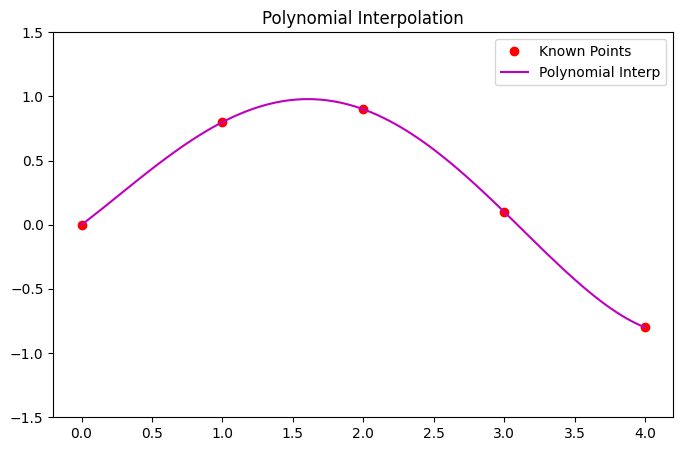

In [ ]:
import torch
import matplotlib.pyplot as plt

# 1. Known data points
x_known = torch.tensor([0., 1., 2., 3., 4.])
y_known = torch.tensor([0., 0.8, 0.9, 0.1, -0.8])

# 2. Create Vandermonde matrix and solve for polynomial coefficients
V = torch.vander(x_known)
coeffs = torch.linalg.solve(V, y_known)

# 3. Evaluate the polynomial at new points
x_interp = torch.linspace(0, 4, 100)
# Use broadcasting to evaluate the polynomial: y = c0*x^n + c1*x^(n-1) + ...
# Note: torch.vander creates powers in descending order, so we flip coeffs.
y_interp = torch.stack([x_interp**(len(coeffs)-1-i) for i in range(len(coeffs))]).T @ coeffs

# 4. Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_known, y_known, 'ro', label='Known Points')
plt.plot(x_interp, y_interp, 'm-', label='Polynomial Interp')
plt.title("Polynomial Interpolation")
plt.ylim(-1.5, 1.5) # Limit y-axis to see Runge's phenomenon
plt.legend()
plt.show()